In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [2]:
# Read Excel file
corpus_df = pd.read_excel('normalized_corpus_df.xlsx')
corpus_df = corpus_df.iloc[: , 1:]
corpus_df

,norm_review
0,feel lucky found used phone us used hard phone...
1,nice phone nice grade pantach revue clean set ...
2,pleased
3,works good goes slow sometimes good phone love
4,great phone replace lost phone thing volume bu...
5,already phone problems know stated used dang s...
6,charging port loose got soldered needed new ba...
7,phone looks good wouldnt stay charged buy new ...
8,originally using samsung galaxy sprint wanted ...
9,battery life great responsive touch issue some...


In [3]:
# Convert DataFrame to array
norm_corpus = np.array(corpus_df['norm_review'])
norm_corpus

array(['feel lucky found used phone us used hard phone line someone upgraded sold one son liked old one finally fell apart years didnt want upgrade thank seller really appreciate honesty said used phonei recommend seller highly would',
       'nice phone nice grade pantach revue clean set easy set never android phone fantastic say least perfect size surfing social media great phone samsung',
       'pleased', 'works good goes slow sometimes good phone love',
       'great phone replace lost phone thing volume button work still go settings adjust job eligible upgrade phone againthaanks',
       'already phone problems know stated used dang state charge wish would read comments would purchased item cracked side damaged goods trying charge another way work requesting money back get money backsigned unhappy customer',
       'charging port loose got soldered needed new battery well later including cost purchase usable phone phone sold state',
       'phone looks good wouldnt stay charged b

In [4]:
# Get bag of words featues in sparse format (mostly zeros)
cv = CountVectorizer(min_df = 0., max_df = 1.)
cv_matrix = cv.fit_transform(norm_corpus).toarray()
cv_matrix

array([[0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [5]:
#TF-IDF
tv = TfidfVectorizer (min_df = 0.2, max_df = 0.8, norm = 'l2', use_idf = True, smooth_idf = True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names()
pd.DataFrame (np.round(tv_matrix, 2), columns = vocab)

,battery,get,great,issue,one,problems,still,well
0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.66,0.00,0.00,0.00,0.75,0.00
5,0.00,0.71,0.00,0.00,0.00,0.71,0.00,0.00
6,0.71,0.00,0.00,0.00,0.00,0.00,0.00,0.71
7,0.73,0.00,0.00,0.00,0.00,0.00,0.68,0.00
8,0.43,0.00,0.69,0.00,0.00,0.00,0.40,0.43
9,0.52,0.52,0.42,0.52,0.00,0.00,0.00,0.00


In [6]:
#Document similarity based on Cosine function
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.729948,0.652833,0.534624,0.877330,1.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.0,0.0,0.657351,0.000000,0.000000,0.000000,0.690668,0.422325,0.000000,0.683503,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.628005,0.000000
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.657351,0.0,0.0,1.000000,0.000000,0.000000,0.511754,0.752348,0.277616,0.000000,0.449301,0.000000,0.432478,0.000000,0.000000,0.412539,0.657351,0.412819,0.000000
5,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.370054,0.707107,0.000000,0.000000,0.000000,0.479887,0.000000,0.418424,0.000000,0.550277,0.000000
6,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.519054,0.605185,0.370054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.418424,0.000000,0.000000,0.500000
7,0.000000,0.000000,0.0,0.0,0.511754,0.000000,0.519054,1.000000,0.582969,0.384156,0.000000,0.000000,0.000000,0.389727,0.000000,0.000000,0.371759,0.000000,0.000000,0.000000
8,0.000000,0.690668,0.0,0.0,0.752348,0.000000,0.605185,0.582969,1.000000,0.515638,0.000000,0.472073,0.000000,0.227199,0.000000,0.000000,0.469948,0.690668,0.433743,0.302592
9,0.000000,0.422325,0.0,0.0,0.277616,0.370054,0.370054,0.384156,0.515638,1.000000,0.000000,0.288660,0.396428,0.324647,0.177584,0.000000,0.309679,0.422325,0.265222,0.370054


In [7]:
# Hierarchical clustering dendogram
Z = linkage (similarity_df, 'ward')
Z

array([[ 0.        , 15.        ,  0.        ,  2.        ],
       [ 1.        , 17.        ,  0.        ,  2.        ],
       [ 2.        ,  3.        ,  0.        ,  2.        ],
       [ 5.        , 10.        ,  0.74518502,  2.        ],
       [12.        , 13.        ,  0.78455468,  2.        ],
       [ 4.        ,  8.        ,  0.83115099,  2.        ],
       [14.        , 20.        ,  0.85705006,  3.        ],
       [ 6.        ,  7.        ,  1.06267001,  2.        ],
       [16.        , 27.        ,  1.11661681,  3.        ],
       [ 9.        , 19.        ,  1.34299844,  2.        ],
       [18.        , 21.        ,  1.46443406,  3.        ],
       [28.        , 29.        ,  1.51910047,  5.        ],
       [11.        , 26.        ,  1.67953828,  4.        ],
       [25.        , 30.        ,  1.69662019,  5.        ],
       [24.        , 32.        ,  1.7638135 ,  6.        ],
       [22.        , 23.        ,  2.0708019 ,  4.        ],
       [31.        , 35.

In [8]:
pd.DataFrame(Z, columns=['Documents\Cluster 1','Documents\Cluster 2',
                        'Distance', 'Cluster Size'], dtype = 'object')

,Documents\Cluster 1,Documents\Cluster 2,Distance,Cluster Size
0,0.0,15.0,0.0,2.0
1,1.0,17.0,0.0,2.0
2,2.0,3.0,0.0,2.0
3,5.0,10.0,0.745185,2.0
4,12.0,13.0,0.784555,2.0
5,4.0,8.0,0.831151,2.0
6,14.0,20.0,0.85705,3.0
7,6.0,7.0,1.06267,2.0
8,16.0,27.0,1.116617,3.0
9,9.0,19.0,1.342998,2.0


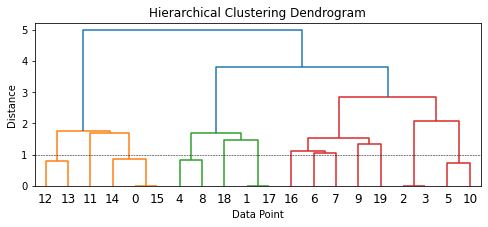

In [9]:
plt.figure (figsize = (8,3))
plt.title ('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y = 1.0,c = 'k',ls = '--',lw = 0.5);

In [10]:
#Document clustering dataframe with cluster labels
max_dist = 1.0
cluster_lables = fcluster(Z, max_dist, criterion = 'distance')
cluster_lables = pd.DataFrame(cluster_lables, columns = ['ClusterLabel'])
pd.concat([corpus_df, cluster_lables], axis=1)

,norm_review,ClusterLabel
0,feel lucky found used phone us used hard phone...,2
1,nice phone nice grade pantach revue clean set ...,5
2,pleased,12
3,works good goes slow sometimes good phone love,12
4,great phone replace lost phone thing volume bu...,4
5,already phone problems know stated used dang s...,13
6,charging port loose got soldered needed new ba...,7
7,phone looks good wouldnt stay charged buy new ...,8
8,originally using samsung galaxy sprint wanted ...,4
9,battery life great responsive touch issue some...,10
